<a href="https://colab.research.google.com/github/Rafazand/PCVK_2024/blob/main/PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

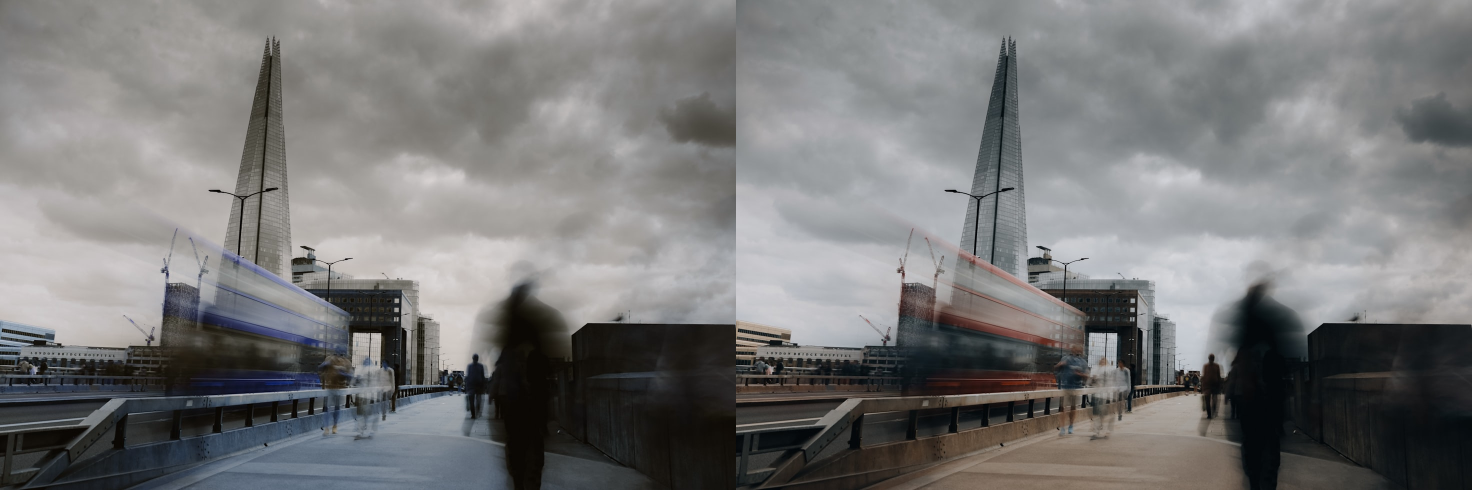

In [73]:
# step 1
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

# Membuat list untuk menyimpan url dari beberapa image
urls = ["https://images.unsplash.com/photo-1724766609759-6c4c589809d4?q=80&w=1471&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"]


# loop pada tiap url image, beberapa image dapat disimpan pada list
for url in urls:
  image = io.imread(url)
  image = cv.resize(image, (0,0), fx=0.5, fy=0.5)
  image_2 = cv.cvtColor (image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat ((image, image_2))

tinggi = image_2.shape[0]
lebar = image_2.shape[1]
cv2_imshow(final_frame)

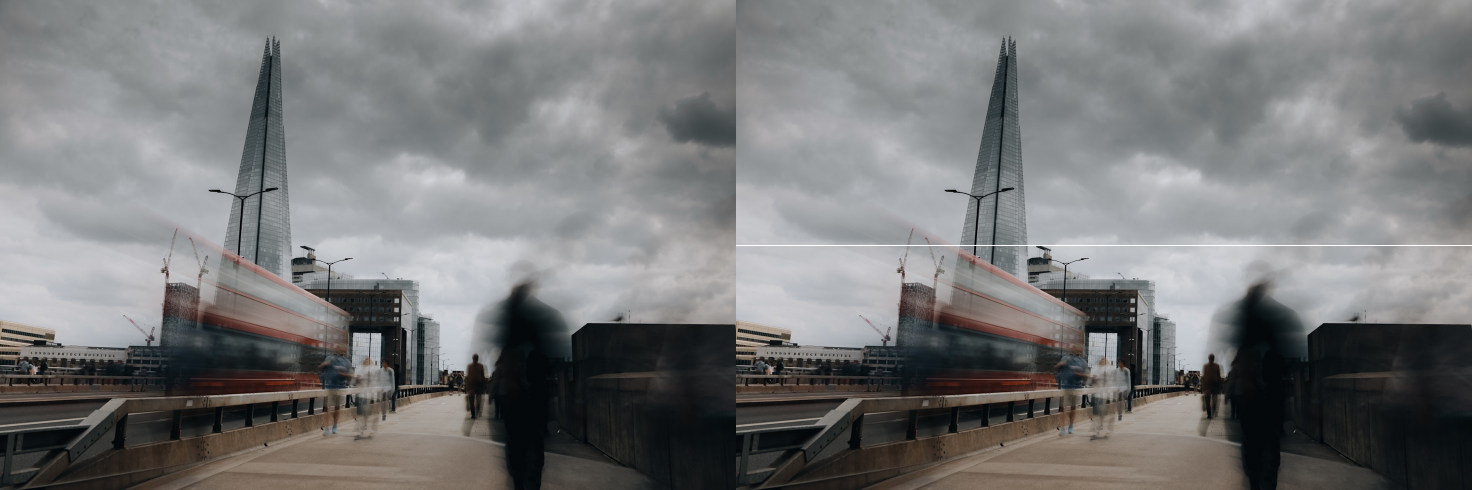

In [70]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

for y in range (lebar):
  image_3[int((tinggi)/2),y] = [255,255,255]

final_frame = cv.hconcat ((image_2, image_3))
cv2_imshow(final_frame)


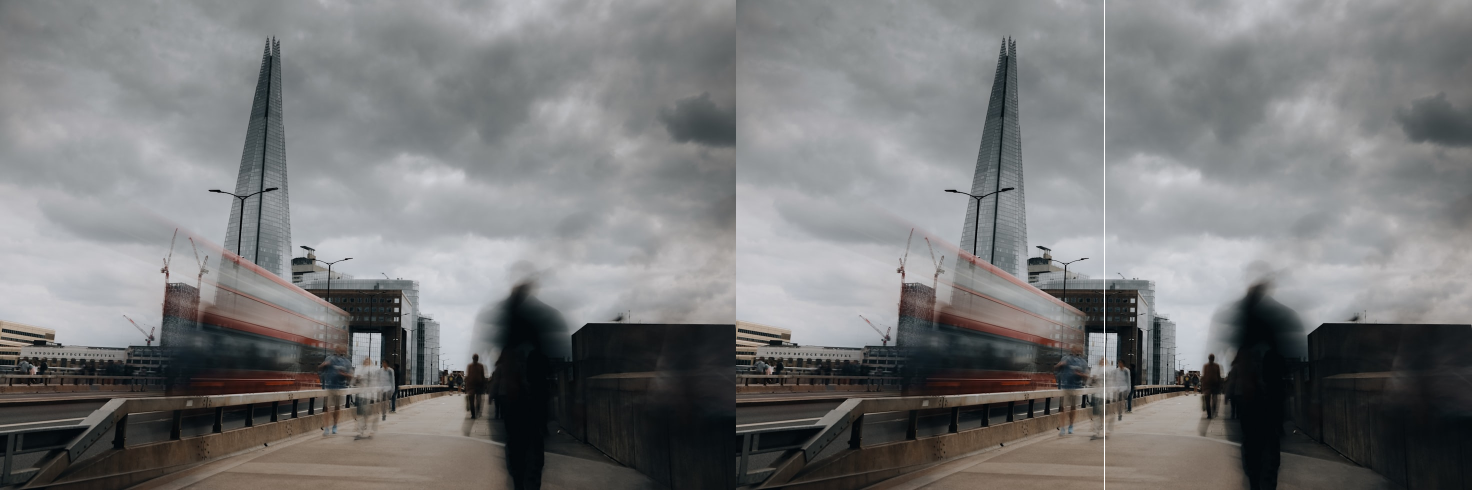

In [71]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Menggambar garis vertikal
for x in range (tinggi):
  image_3[x,int((lebar)/2)] = [255,255,255]

final_frame = cv.hconcat ((image_2, image_3))
cv2_imshow(final_frame)

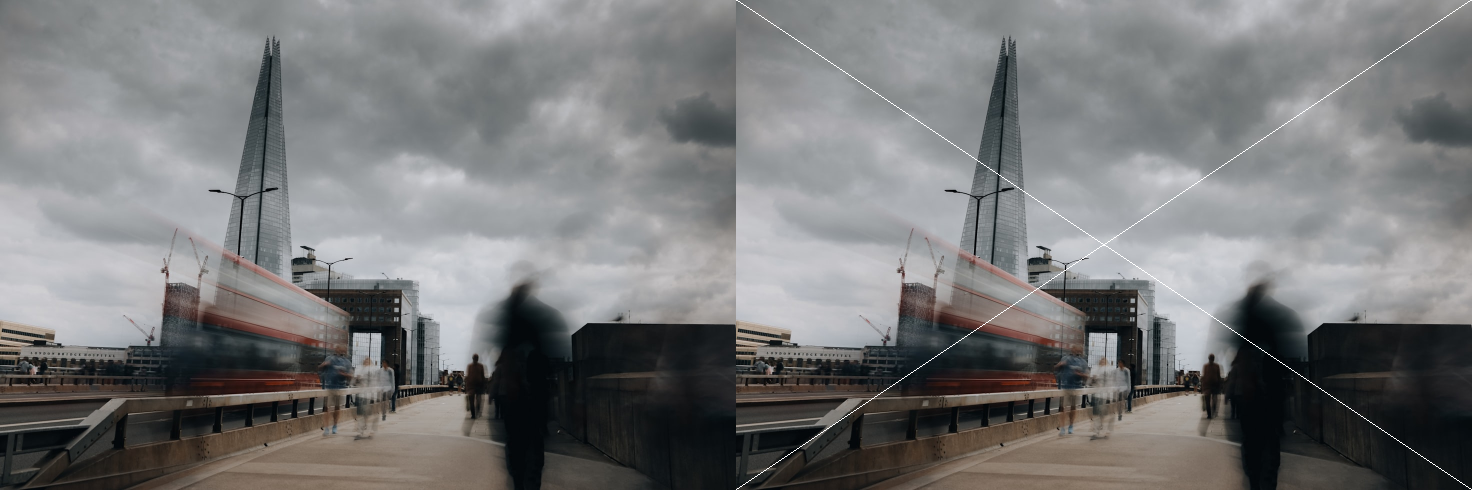

In [6]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#creating crossed line

# kiri ke kanan
for i in range(lebar):
    y = int(i * tinggi / lebar)
    image_3[y, i] = [255, 255, 255]
# kanan ke kiri
for i in range(lebar):
    y = int(i * tinggi / lebar)
    image_3[y,lebar -1 -i] = [255, 255, 255]


final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

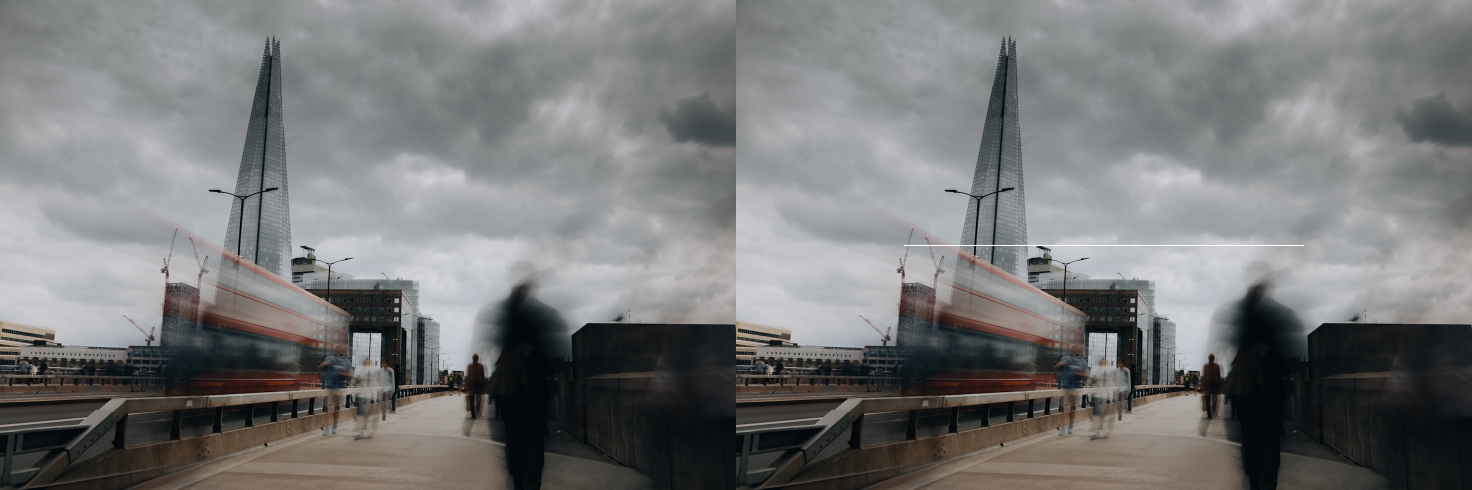

In [ ]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#line length
panjang_garis = 400

#counting middle part
tengah_y = int(tinggi / 2)
tengah_x_start = int((lebar - panjang_garis) / 2)
tengah_x_end = tengah_x_start + panjang_garis

#creating horizontal line in midplace
for y in range(tengah_x_start, tengah_x_end):
    image_3[tengah_y, y] = [255, 255, 255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

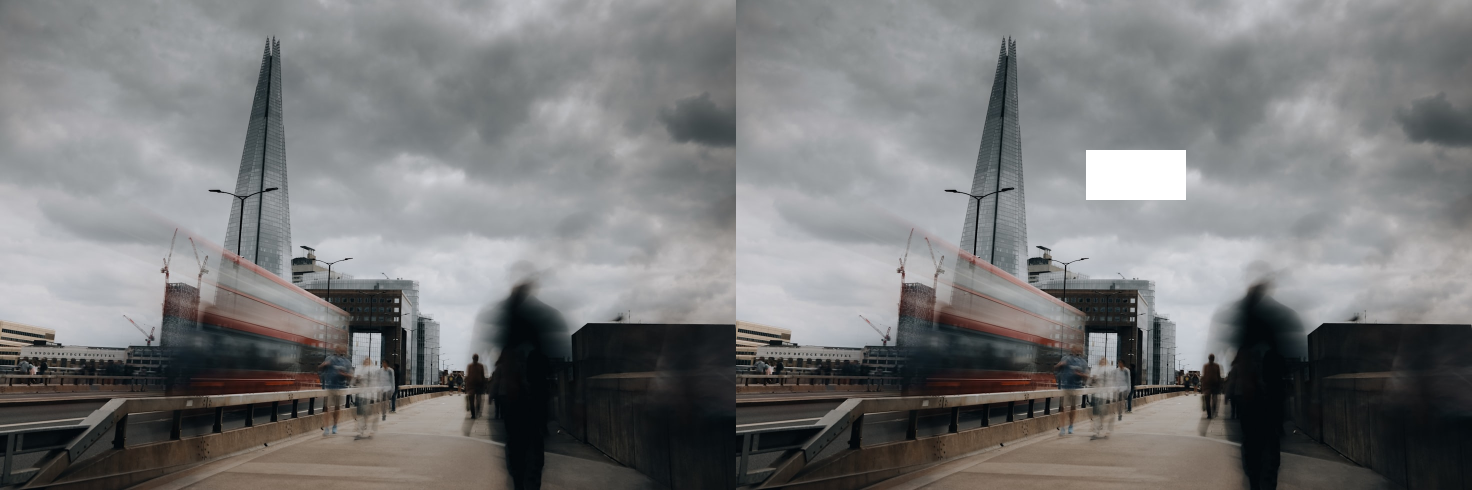

In [ ]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#marking the spot
x_start = 350  #x coordinate
y_start = 150  #y coordinate
lebar_kotak = 100  #width
tinggi_kotak = 50   #height

#creating white rectangle
for y in range(y_start, y_start + tinggi_kotak):
    for x in range(x_start, x_start + lebar_kotak):
        if x < lebar and y < tinggi:  #make sure it didnt out from image
            image_3[y, x] = [255, 255, 255]
final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

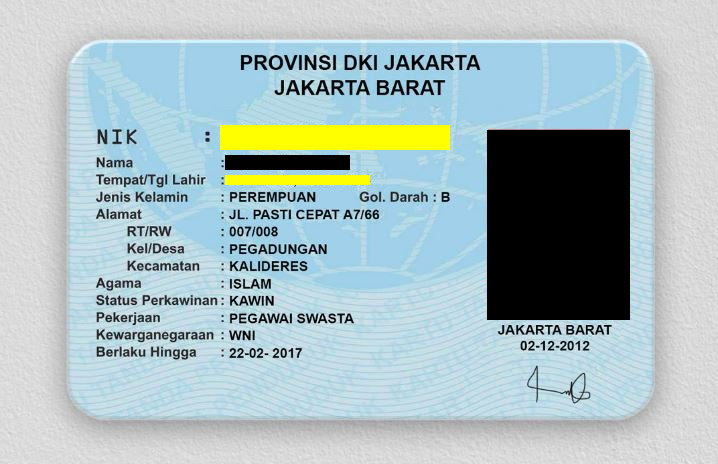

In [61]:

image_path = "/content/ktp.jpeg"

image = io.imread(image_path)
image_2 = cv.cvtColor (image, cv.COLOR_BGR2RGB)

#fungsi buat box
def cover_parts(image, coords, color):
    for (x1, y1, x2, y2) in coords:
        image[y1:y2, x1:x2] = color
    return image

#Coordinate
groups = {
    1: [(220,125, 450, 150)],    # NIK
    2: [(225,155, 350, 170)],    # Nama
    3: [(225,175, 370, 185)],    # Tempat tgl/Lahir
    4: [(487,130, 630, 320)],

}

# Colors for each group (using two different colors)
colors = [(0, 0, 0), (0, 255, 255)]  # black and yellow

#run
masked_image = image_2.copy()
for i, group_coords in enumerate(groups.values(), 1):
    color = colors[i % 2]  # Alternate between two colors
    masked_image = cover_parts(masked_image, group_coords, color)

cv2_imshow(masked_image)